<a href="https://colab.research.google.com/github/MhT-an/DSA3101-E-commerce-SubGroup-A/blob/main/Q3/Part_2/q3ii.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://support.google.com/analytics/answer/3437719?hl=en

## Copy these cells to make your own queries

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
import os

%matplotlib inline

# Creating sales data metrics

# ROI

In [3]:
result = pd.read_parquet('aov_conversion.parquet')
result

,channel,total_users,total_sessions,total_transactions,total_revenue,avg_pageviews,avg_time_on_site,avg_bounces,avg_order_value,conversion_rate
0,(none),275409,371467,9160,1190175.11,4.972398,299.891050,0.417959,129.931781,0.024659
1,organic,195418,234381,2221,204889.05,4.057434,280.767406,0.491546,92.250810,0.009476
2,cpm,4039,6184,150,78268.19,5.466688,301.436945,0.360285,521.787933,0.024256
3,referral,239977,262022,326,40954.76,2.009523,149.724200,0.627192,125.628098,0.001244
4,cpc,9870,13079,248,25176.76,5.551537,299.712199,0.370135,101.519194,0.018962
5,affiliate,13400,16403,9,597.38,2.891104,309.142969,0.530452,66.375556,0.000549
6,(not set),89,117,1,9.99,3.641026,228.774194,0.470085,9.990000,0.008547


From printing this table, we note that CPM has the highest average order value.
Out of all the set channels, it also has the highest conversion rate.

We define average order value as the total revenue per transaction.
Similarly, conversion rate is defined as the ratio of transactions to sessions.

# Marketing campaign

In [4]:
result = pd.read_parquet('marketing_metrics.parquet')
result

,campaign,total_users,total_sessions,total_transactions,total_revenue,avg_pageviews,avg_time_on_site,avg_bounces,avg_order_value,conversion_rate
0,AW - Accessories,4042,5327,100,13997.55,5.063826,189.479820,0.354421,139.975500,0.018772
1,(not set),695862,875599,11865,1514688.95,3.840579,130.178788,0.500189,127.660257,0.013551
2,AW - Dynamic Search Ads Whole Site,4921,6213,141,10787.36,6.505553,205.280058,0.326734,76.506099,0.022694
3,Data Share Promo,13399,16403,9,597.38,2.890630,144.741937,0.530513,66.375556,0.000549
4,AW - Electronics,31,74,0,NaN,9.310811,324.189189,0.432432,NaN,0.000000
5,All Products,4,4,0,NaN,1.000000,0.000000,1.000000,NaN,0.000000
6,Data Share,1,1,0,NaN,3.000000,16.000000,0.000000,NaN,0.000000
7,AW - Apparel,28,32,0,NaN,4.812500,170.687500,0.281250,NaN,0.000000


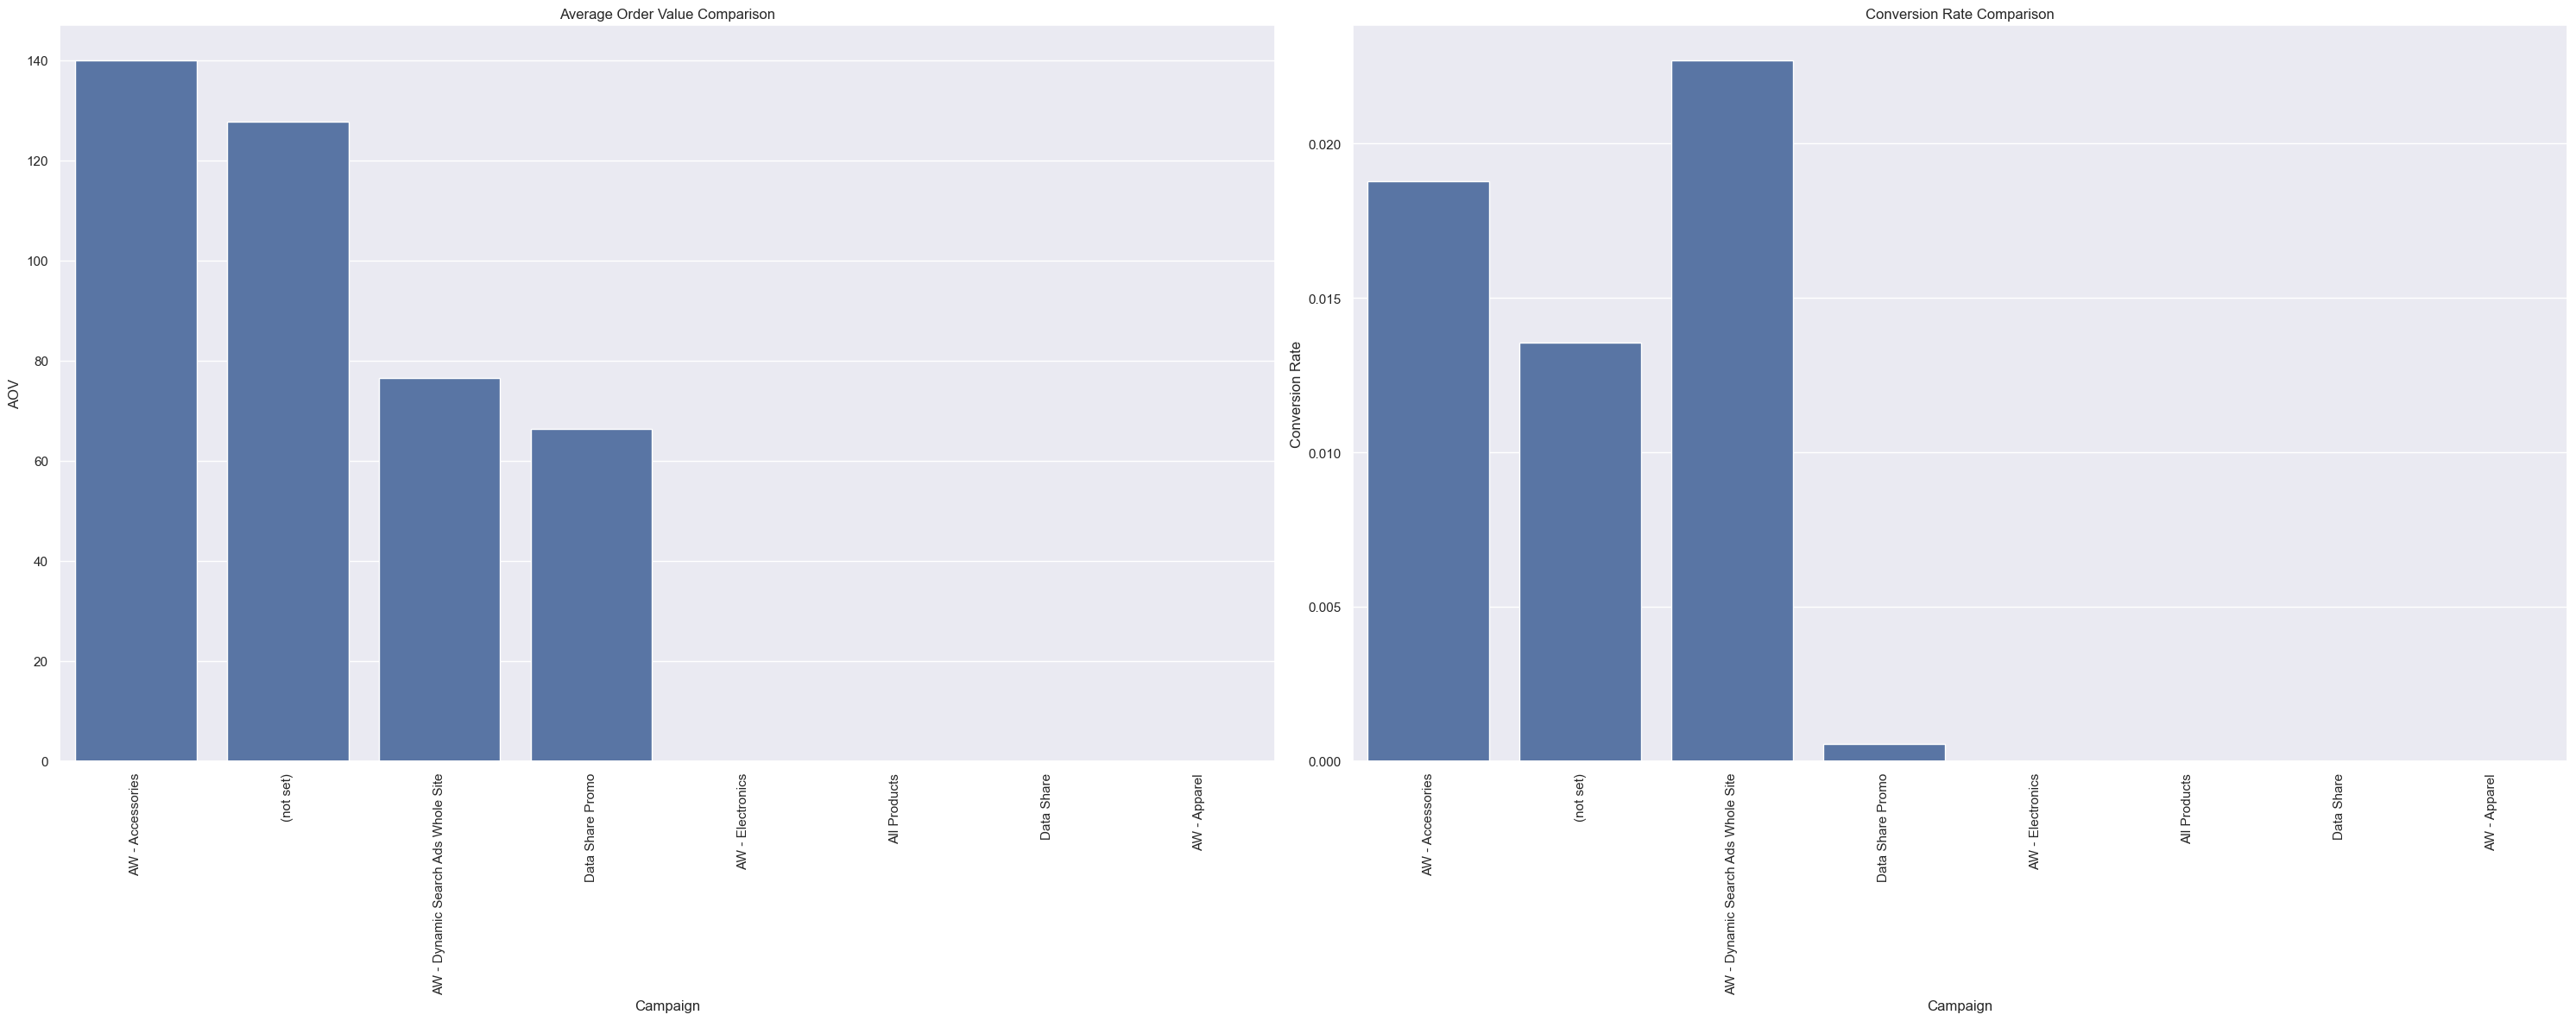

In [5]:
fig, axes = plt.subplots(1,2)
fig.set_figwidth(30)
fig.set_figheight(12)

sns.barplot(ax = axes[0], x='campaign', y='avg_order_value', data=result)
axes[0].set_title("Average Order Value Comparison")
axes[0].set_xlabel("Campaign")
axes[0].set_ylabel("AOV")

sns.barplot(ax = axes[1], x='campaign', y='conversion_rate', data=result)
axes[1].set_title("Conversion Rate Comparison")
axes[1].set_xlabel("Campaign")
axes[1].set_ylabel("Conversion Rate")

for a in axes:
  for tick in a.get_xticklabels():
    tick.set_rotation(90)

plt.tight_layout()
plt.show()

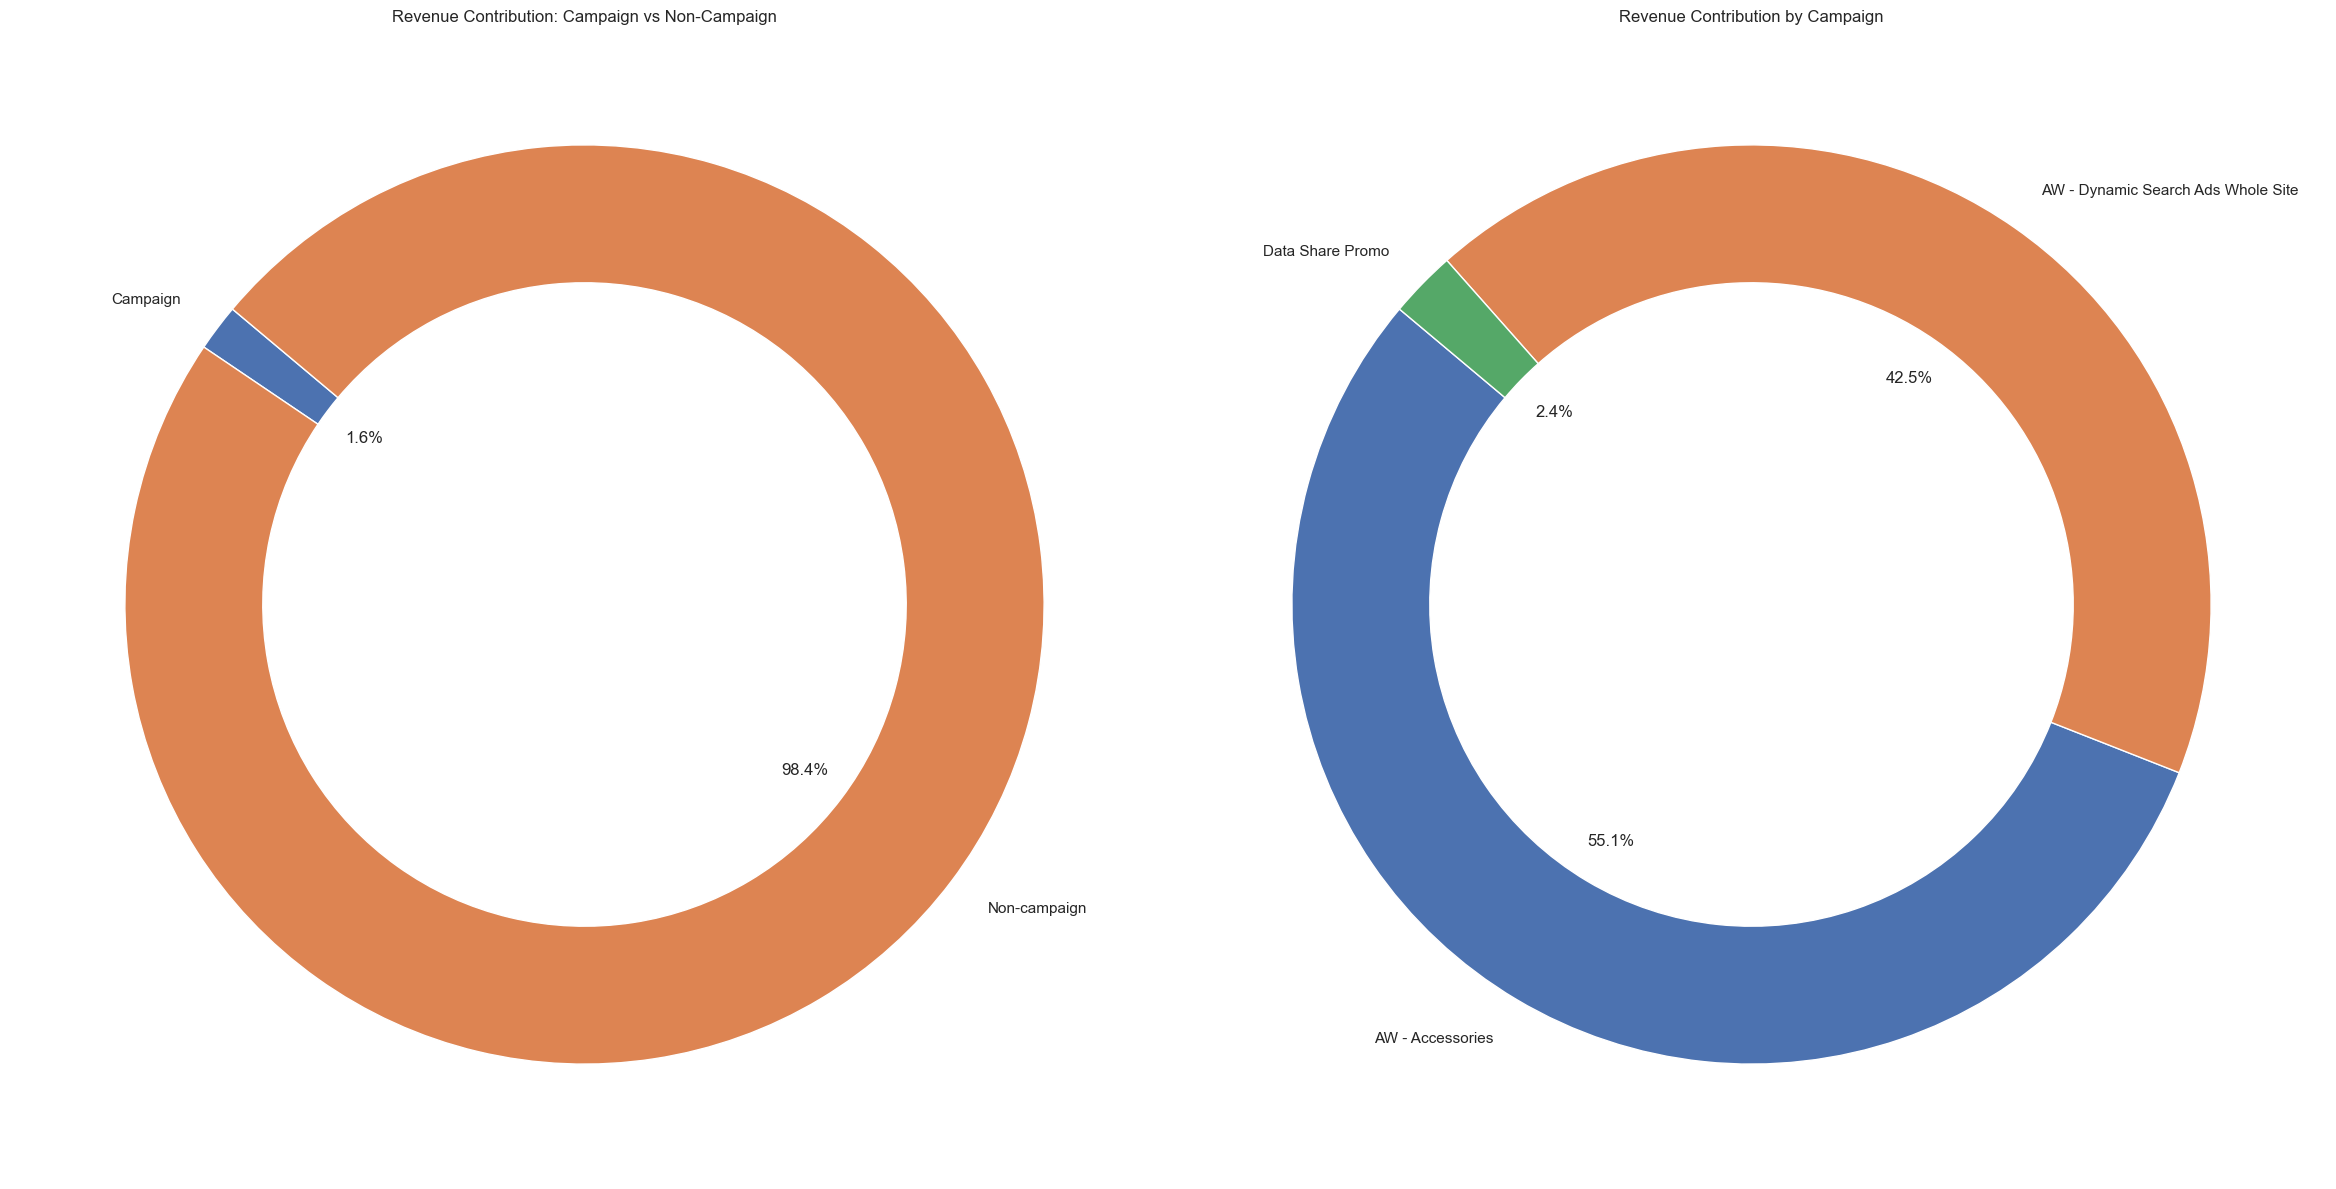

In [6]:
labels = ['Campaign', 'Non-campaign']
revenues = [result[result['campaign'] != '(not set)']['total_revenue'].sum(), result[result['campaign'] == '(not set)']['total_revenue'].sum()]

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (24, 16))


ax1.pie(revenues, labels=labels, autopct='%1.1f%%', startangle=140, wedgeprops={'width': 0.3})
ax1.set_title("Revenue Contribution: Campaign vs Non-Campaign")

new_res = result[result['campaign'] != '(not set)']
new_res = new_res[new_res['total_revenue'] > 0]
ax2.pie(new_res['total_revenue'], labels=new_res['campaign'], autopct='%1.1f%%', startangle=140, wedgeprops={'width': 0.3})
ax2.set_title("Revenue Contribution by Campaign")

plt.tight_layout()
plt.show()

From this analysis, we note that campaigns make up less than 2% of all revenue contributions.

We also find that campaign revenue is mostly dominated by the "Accessories" campaign and the "Dynamic Search Ads Whole Site" campaign.

C:\Users\user\AppData\Local\Temp\ipykernel_23856\1551670225.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



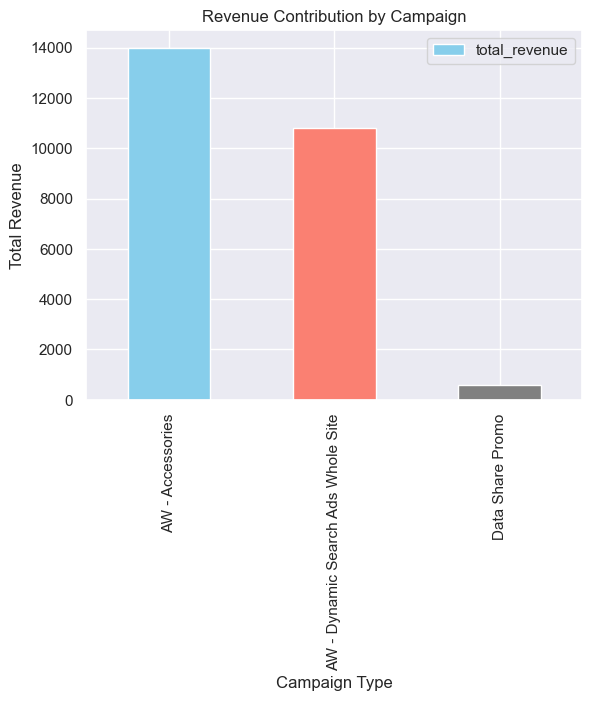

In [7]:
result[result['campaign'] != '(not set)'][result['total_revenue'] > 0].plot(kind='bar', x='campaign', y='total_revenue', stacked=True, color=['skyblue', 'salmon', 'grey'])
plt.title("Revenue Contribution by Campaign")
plt.xlabel("Campaign Type")
plt.ylabel("Total Revenue")
plt.show()

In [8]:
result = pd.read_parquet("campaign_distribution.parquet")
result

,campaign,pageviews,time_on_site
0,(not set),147,2313
1,(not set),15,709
2,AW - Dynamic Search Ads Whole Site,16,163
3,(not set),17,193
4,(not set),18,465
...,...,...,...
451864,(not set),9,143
451865,(not set),9,49
451866,(not set),13,247
451867,(not set),12,201


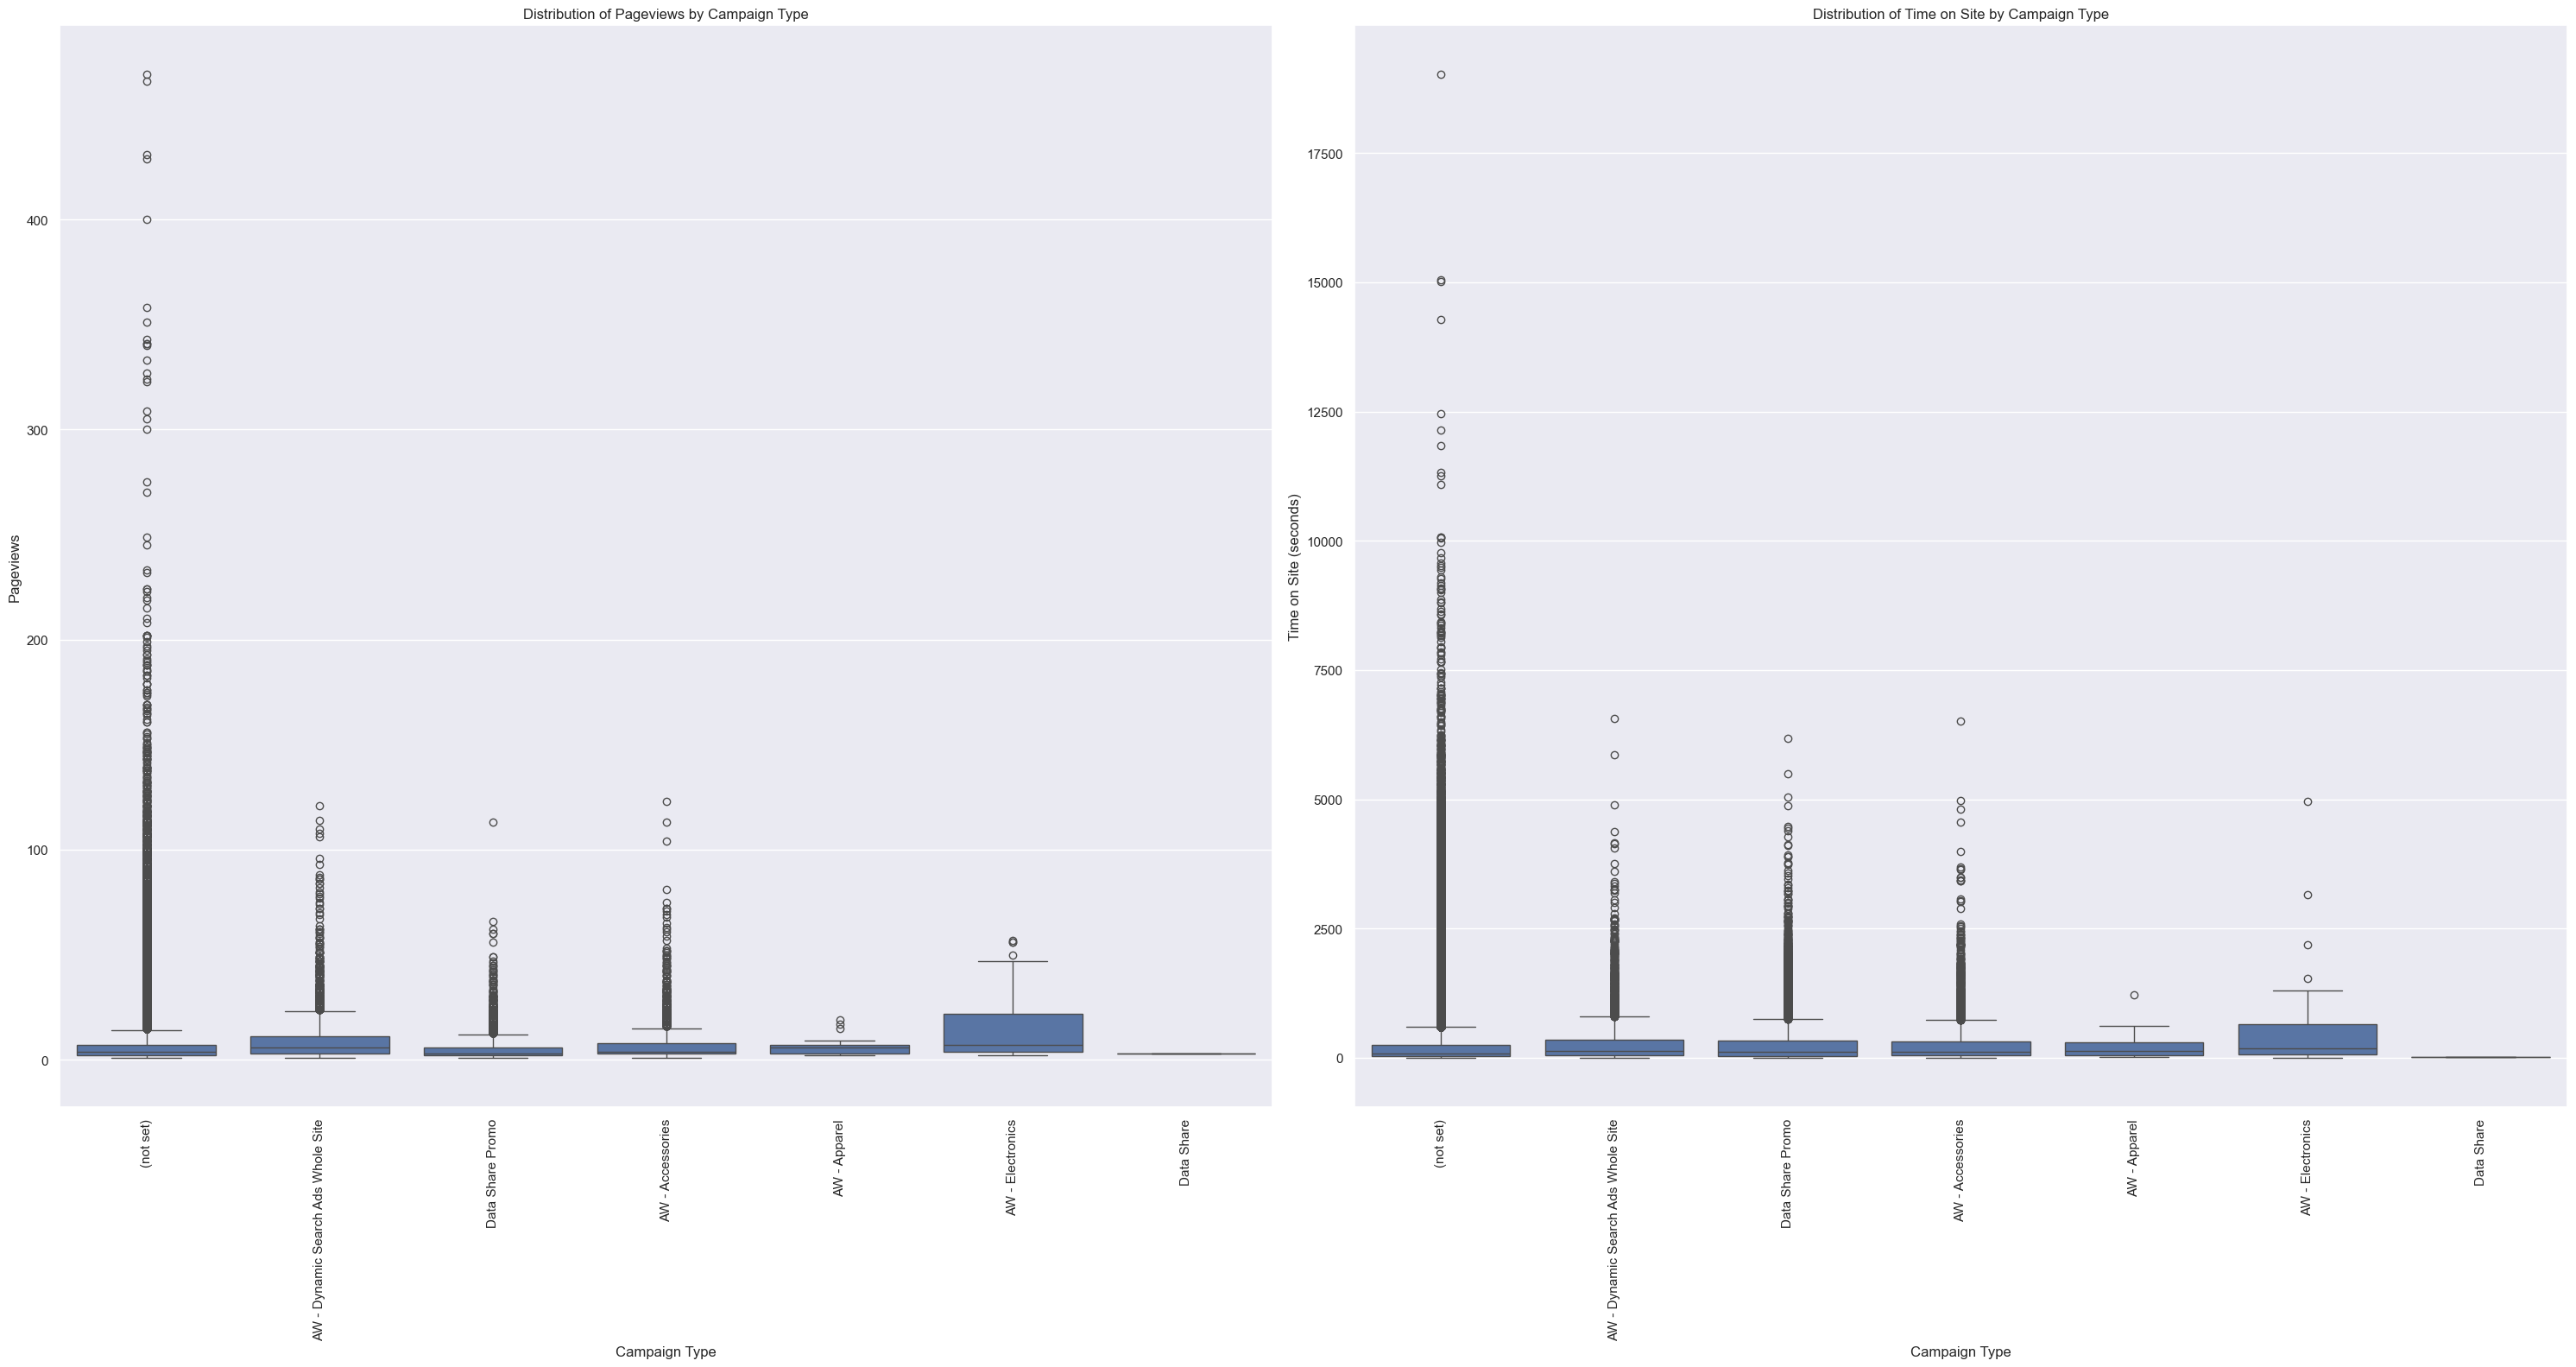

In [9]:
fig, axes = plt.subplots(1,2)
fig.set_figwidth(30)
fig.set_figheight(16)

ax = axes[0]
sns.boxplot(ax = ax, x='campaign', y='pageviews', data=result)
ax.set_title("Distribution of Pageviews by Campaign Type")
ax.set_xlabel("Campaign Type")
ax.set_ylabel("Pageviews")

# Box plot for Time on Site
ax = axes[1]
sns.boxplot(ax = ax, x='campaign', y='time_on_site', data=result)
ax.set_title("Distribution of Time on Site by Campaign Type")
ax.set_xlabel("Campaign Type")
ax.set_ylabel("Time on Site (seconds)")

for a in axes:
  for tick in a.get_xticklabels():
    tick.set_rotation(90)

plt.tight_layout()
plt.show()

Unfortunately, the distribution of pageviews & time on site by campaign seems to have many outliers across all categories, and the average values for them are also small.

In [10]:
res2 = pd.read_parquet('return_rate_by_campaign.parquet')
res2['date'] = res2['date'].dt.strftime('%Y-%m')
result = res2.groupby(['campaign', 'date'], as_index = False)['return_rate'].mean()

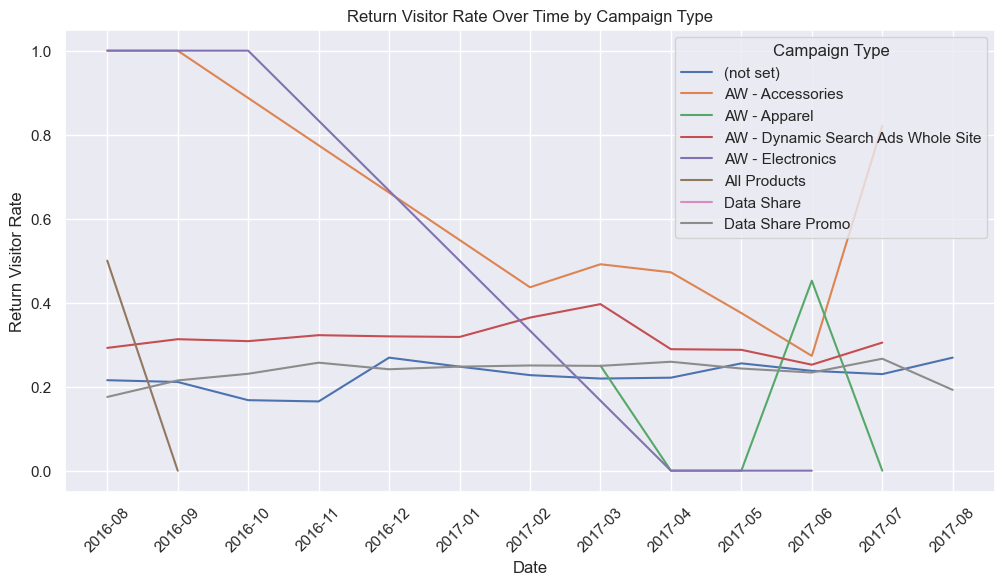

In [11]:
# Initialize the matplotlib figure
plt.figure(figsize=(12, 6))

# Plot line chart
sns.lineplot(data=result, x="date", y="return_rate", hue="campaign")

# Customize the plot
plt.title("Return Visitor Rate Over Time by Campaign Type")
plt.xlabel("Date")
plt.ylabel("Return Visitor Rate")
plt.legend(title="Campaign Type")
plt.xticks(rotation=45)
plt.show()

# New customers pulled in by campaigns

In [12]:
result = pd.read_parquet('new_customer_by_campaign.parquet')

result

,campaign,new_customers,returning_customers,ratio
0,Data Share Promo,13048,1344,9.708333
1,AW - Apparel,27,3,9.000000
2,AW - Dynamic Search Ads Whole Site,4452,790,5.635443
3,AW - Accessories,3550,799,4.443054
4,AW - Electronics,29,12,2.416667
5,All Products,4,0,0.000000
6,Data Share,1,0,0.000000


From this, we find that the Data Share Promo is the most successful at pulling new customers as well as re-attracting returning customers.

# Channel Information

In [13]:
result = pd.read_parquet('campaign_info.parquet')
result

,campaign,channel,user_count,total_revenue,first_visit_date,last_visit_date
0,AW - Accessories,cpc,4042,13997.55,2016-08-03,2017-07-31
1,AW - Dynamic Search Ads Whole Site,cpc,4921,10787.36,2016-08-02,2017-07-31
2,Data Share Promo,affiliate,13399,597.38,2016-08-01,2017-08-01
3,AW - Electronics,cpc,31,NaN,2016-08-01,2017-06-03
4,Data Share Promo,(not set),1,NaN,2016-08-01,2017-08-01
5,All Products,cpc,4,NaN,2016-08-01,2016-09-21
6,Data Share,affiliate,1,NaN,2017-02-15,2017-02-15
7,AW - Apparel,cpc,28,NaN,2017-03-08,2017-07-06
